In [5]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

In [6]:
# Load data
file_path = "usa_co2_temp_1800_2013.csv"
predict_temp_df = pd.read_csv(file_path)
predict_temp_df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,0.253,0.042,NaN,NaN,0.253,0.042,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000,NaN,NaN,12.377868,3.205628
1,United States,1801,0.267,0.044,NaN,NaN,0.267,0.044,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782,NaN,NaN,12.681863,2.895417
2,United States,1802,0.289,0.046,NaN,NaN,0.289,0.046,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723,NaN,NaN,12.859703,3.065703
3,United States,1803,0.297,0.047,NaN,NaN,0.297,0.047,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862,NaN,NaN,12.692603,3.065032
4,United States,1804,0.333,0.052,NaN,NaN,0.333,0.052,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241,NaN,NaN,12.576432,3.379515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,United States,2009,5478.210,17.885,29.615,0.097,1905.943,6.222,39.071,1245.742,...,0.368,649.89,2.122,241.81,0.789,306307565,1.489429e+13,1.676,11.156327,0.220114
210,United States,2010,5675.786,18.368,31.449,0.102,2013.304,6.515,41.343,1308.832,...,0.372,650.38,2.105,247.17,0.800,309011469,1.527062e+13,1.688,11.732877,0.211351
211,United States,2011,5540.173,17.781,32.208,0.103,1903.555,6.109,45.542,1327.528,...,0.357,628.73,2.018,255.55,0.820,311584051,1.550930e+13,1.650,11.811093,0.232825
212,United States,2012,5338.698,17.000,35.270,0.112,1684.037,5.362,48.883,1388.255,...,0.337,618.71,1.970,246.42,0.785,314043885,1.584964e+13,1.567,12.761842,0.269340


In [7]:
predict_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      214 non-null    object 
 1   year                         214 non-null    int64  
 2   co2                          214 non-null    float64
 3   co2_per_capita               214 non-null    float64
 4   cement_co2                   134 non-null    float64
 5   cement_co2_per_capita        134 non-null    float64
 6   coal_co2                     214 non-null    float64
 7   coal_co2_per_capita          214 non-null    float64
 8   flaring_co2                  64 non-null     float64
 9   gas_co2                      132 non-null    float64
 10  gas_co2_per_capita           132 non-null    float64
 11  oil_co2                      154 non-null    float64
 12  oil_co2_per_capita           154 non-null    float64
 13  co2_growth_prct     

In [31]:
# Finding out the number of null values
predict_temp_df.isnull().sum()

country                          0
year                             0
co2                              0
co2_per_capita                   0
cement_co2                      80
cement_co2_per_capita           80
coal_co2                         0
coal_co2_per_capita              0
flaring_co2                    150
gas_co2                         82
gas_co2_per_capita              82
oil_co2                         60
oil_co2_per_capita              60
co2_growth_prct                  1
co2_per_gdp                     20
methane                        190
methane_per_capita             190
nitrous_oxide                  190
nitrous_oxide_per_capita       190
population                       0
gdp                             20
energy_per_gdp                 165
Avg Temperature                  0
Avg Temperature Uncertainty      0
dtype: int64

In [39]:
predict_temp_df['flaring_co2'].fillna(predict_temp_df['flaring_co2'].mean(), inplace = True)
predict_temp_df['cement_co2'].fillna(predict_temp_df['cement_co2'].mean(), inplace = True)
predict_temp_df['cement_co2_per_capita'].fillna(predict_temp_df['cement_co2_per_capita'].mean(), inplace = True)
predict_temp_df['gas_co2'].fillna(predict_temp_df['gas_co2'].mean(), inplace = True)
predict_temp_df['gas_co2_per_capita'].fillna(predict_temp_df['gas_co2_per_capita'].mean(), inplace = True)
predict_temp_df['oil_co2'].fillna(predict_temp_df['oil_co2'].mean(), inplace = True)
predict_temp_df['oil_co2_per_capita'].fillna(predict_temp_df['oil_co2_per_capita'].mean(), inplace = True)
predict_temp_df['co2_per_gdp'].fillna(predict_temp_df['co2_per_gdp'].mean(), inplace = True)
predict_temp_df['methane'].fillna(predict_temp_df['methane'].mean(), inplace = True)
predict_temp_df['methane_per_capita'].fillna(predict_temp_df['methane_per_capita'].mean(), inplace = True)
predict_temp_df['nitrous_oxide'].fillna(predict_temp_df['nitrous_oxide'].mean(), inplace = True)
predict_temp_df['nitrous_oxide_per_capita'].fillna(predict_temp_df['nitrous_oxide_per_capita'].mean(), inplace = True)
predict_temp_df['gdp'].fillna(predict_temp_df['gdp'].mean(), inplace = True)
predict_temp_df['energy_per_gdp'].fillna(predict_temp_df['energy_per_gdp'].mean(), inplace = True)

predict_temp_df.isnull().sum()

country                        0
year                           0
co2                            0
co2_per_capita                 0
cement_co2                     0
cement_co2_per_capita          0
coal_co2                       0
coal_co2_per_capita            0
flaring_co2                    0
gas_co2                        0
gas_co2_per_capita             0
oil_co2                        0
oil_co2_per_capita             0
co2_growth_prct                1
co2_per_gdp                    0
methane                        0
methane_per_capita             0
nitrous_oxide                  0
nitrous_oxide_per_capita       0
population                     0
gdp                            0
energy_per_gdp                 0
Avg Temperature                0
Avg Temperature Uncertainty    0
dtype: int64

In [9]:
predict_temp_df.describe()

,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,gas_co2_per_capita,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
count,214.000000,214.000000,214.000000,134.000000,134.000000,214.000000,214.000000,64.000000,132.000000,132.000000,...,194.000000,24.00000,24.000000,24.000000,24.000000,2.140000e+02,1.940000e+02,49.000000,214.000000,214.000000
mean,1906.500000,1775.834846,9.659154,18.398612,0.085731,777.669472,5.111668,27.881063,497.198833,2.186538,...,0.718742,688.96250,2.443500,259.413333,0.916625,1.119351e+08,3.055051e+12,2.602592,10.751153,1.052999
std,61.920648,2020.307607,7.936626,15.957292,0.066645,713.472753,3.865967,14.917967,493.504137,1.860509,...,0.430826,51.32097,0.358221,10.101674,0.087861,9.337697e+07,4.331154e+12,0.711109,0.795526,1.088695
min,1800.000000,0.253000,0.042000,0.000000,0.000000,0.253000,0.042000,4.990000,0.165000,0.003000,...,0.029000,618.71000,1.956000,241.810000,0.782000,6.000000e+06,2.668967e+10,1.567000,8.382194,0.169596
25%,1853.250000,30.911250,1.185250,0.007000,0.000000,30.911250,1.185250,12.115250,30.292250,0.290000,...,0.353250,652.19500,2.169000,251.185000,0.861500,2.607410e+07,1.875434e+11,1.970000,10.269767,0.230978
50%,1906.500000,1044.142000,10.775000,16.265500,0.114000,887.893500,5.586500,34.965500,237.925500,1.553500,...,0.713000,666.57000,2.331000,258.900000,0.898500,8.967570e+07,1.014861e+12,2.469000,10.744987,0.389550
75%,1959.750000,2879.977000,16.341000,33.030500,0.143000,1312.315750,7.463000,40.090250,1005.045000,4.172500,...,1.044000,742.09000,2.774000,264.755000,0.994750,1.859870e+08,4.093821e+12,3.428000,11.148932,1.691417
max,2013.000000,6134.521000,22.236000,46.851000,0.171000,2214.838000,14.344000,54.647000,1427.506000,5.231000,...,1.648000,770.75000,3.044000,281.250000,1.048000,3.164005e+08,1.610843e+13,3.746000,13.098420,3.706145


In [40]:
a=np.arange(1,215)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

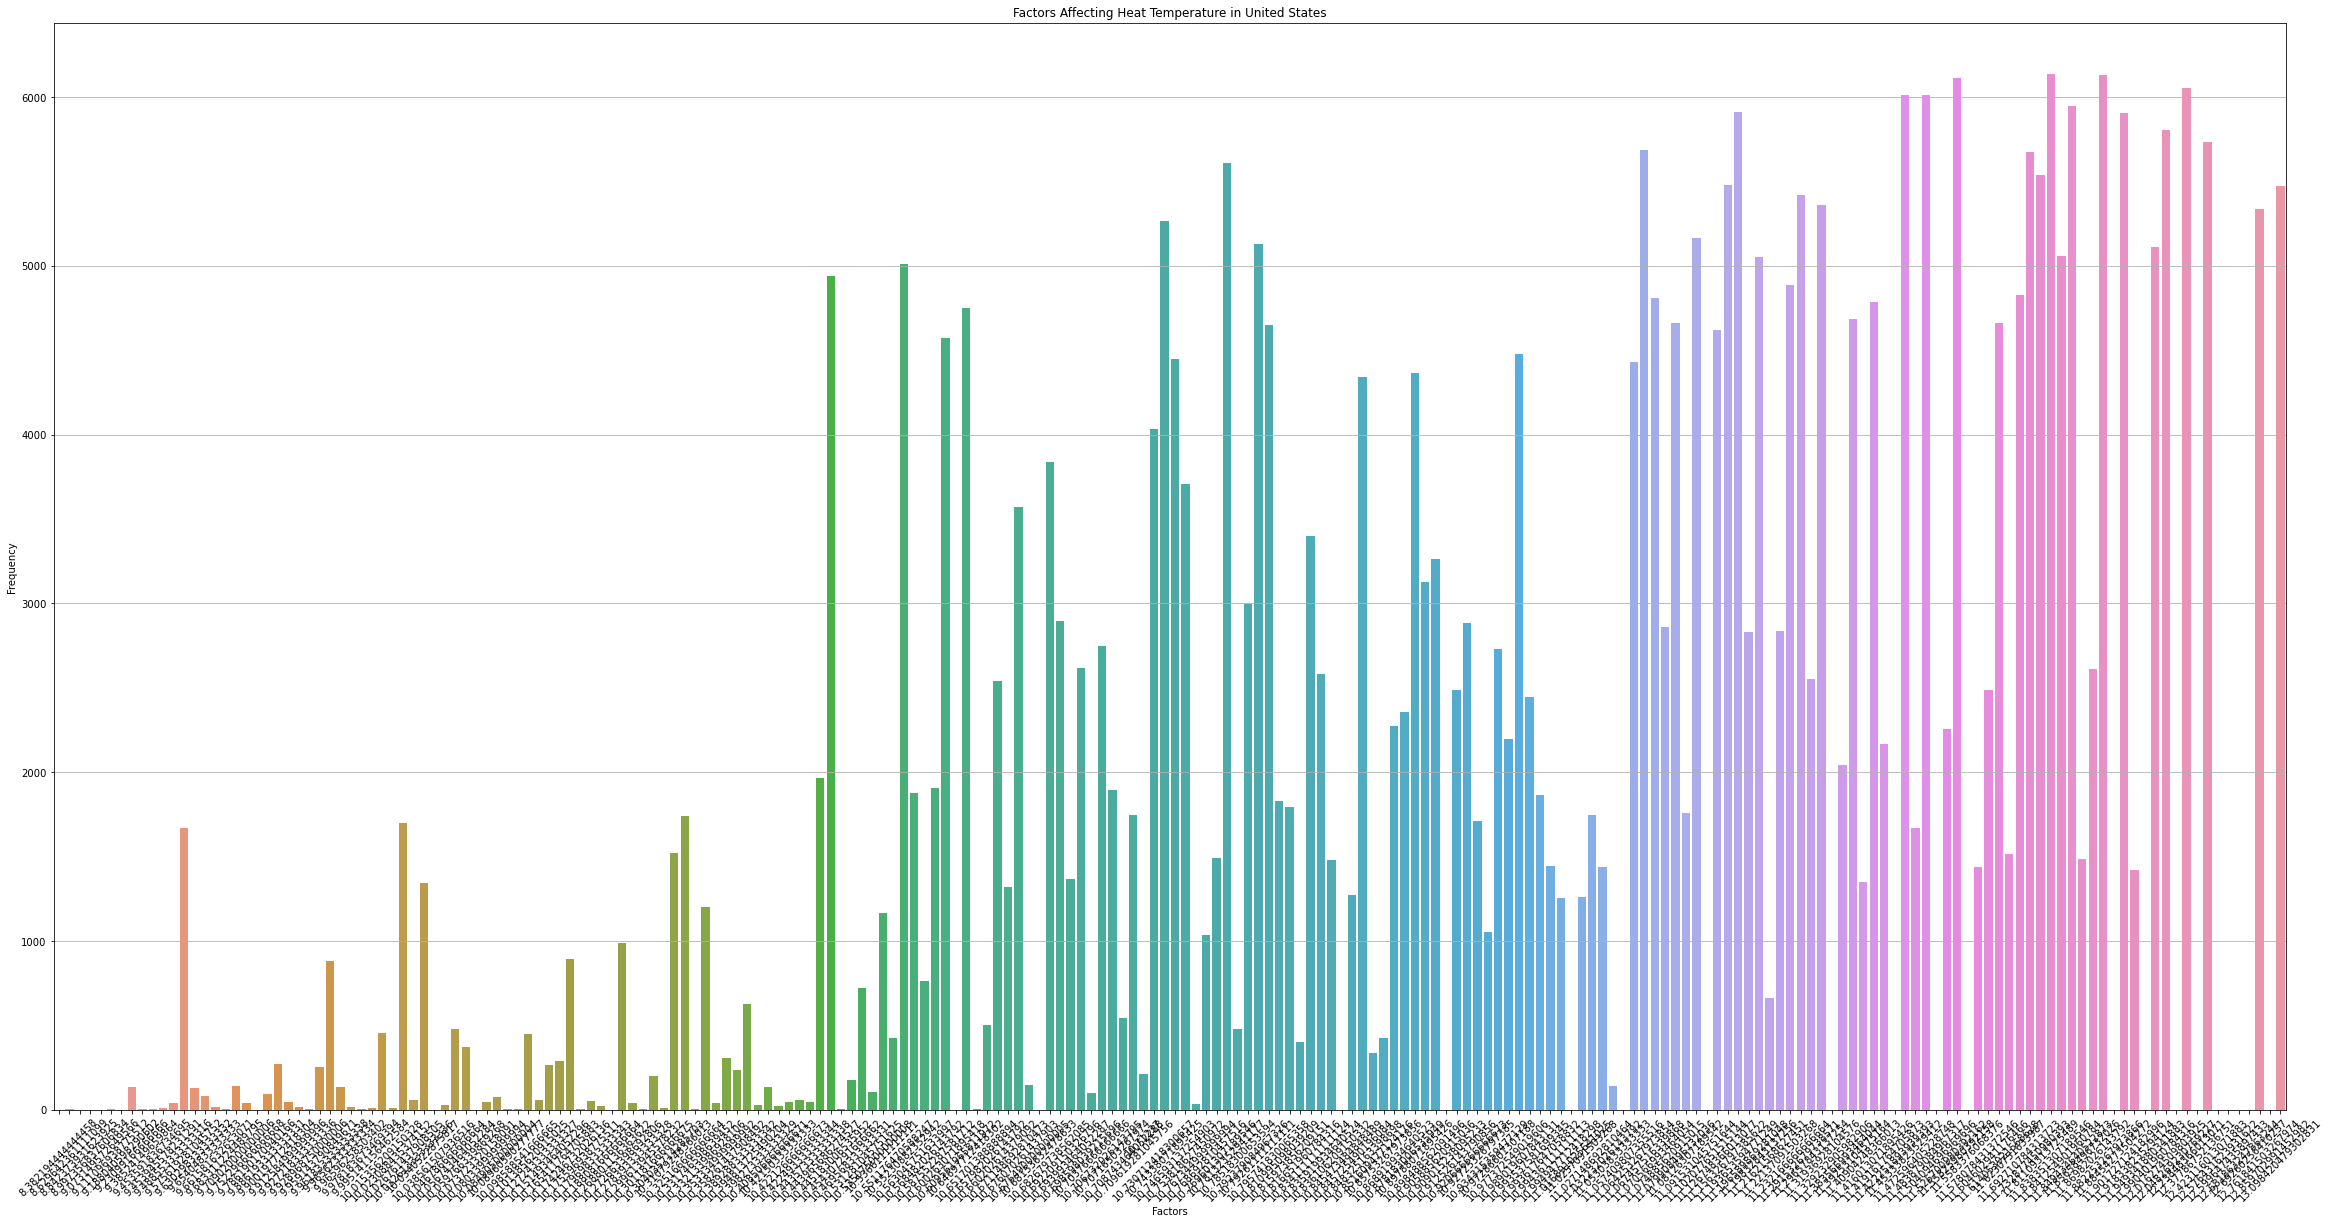

In [63]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Avg Temperature',y='co2',data=predict_temp_df)
plt.grid(axis='y')
plt.title('Factors Affecting Heat Temperature in United States')
plt.xlabel('Factors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

In [42]:
# Putting independent variables as x and dependent variable as y
x=predict_temp_df[['co2','cement_co2','coal_co2','flaring_co2','gas_co2', 'methane', 'nitrous_oxide', 'population','energy_per_gdp' ]]
y=predict_temp_df['Avg Temperature']

In [43]:
# Finding out the linear regression using OLS method
x= sm.add_constant(x)
results = sm.OLS(y,x)

In [44]:
# Fitting the model and summarizing
model=results.fit()
model.summary()S

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg Temperature   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     9.629
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           3.24e-12
Time:                        18:27:37   Log-Likelihood:                -216.32
No. Observations:                 214   AIC:                             452.6
Df Residuals:                     204   BIC:                             486.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             17.6665      4.026      4.388      0.000       9.729      25.604
co2                0.0006      0.000      1.819      0.070   -4.83e-05       0.001
cement_co2         0.0103      0.011      0.903      0.367      -0.012       0.033
coal_co2          -0.0004      0.000     -0.967      0.335      -0.001       0.000
flaring_co2        0.0122      0.008      1.555      0.122      -0.003       0.028
gas_co2           -0.0010      0.001     -1.733      0.085      -0.002       0.000
methane           -0.0027      0.003     -0.804      0.422      -0.009       0.004
nitrous_oxide     -0.0173      0.017     -1.043      0.298      -0.050       0.015
population     -3.933e-09   4.11e-09     -0.957      0.340    -1.2e-08    4.17e-09
energy_per_gdp    -0.3522      0.219     -1.611      0.109      -0.783       0.079
==============================================================================
Omnibus:                       34.180   Durbin-Watson:                   0.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.077
Skew:                           0.748   Prob(JB):                     4.98e-17
Kurtosis:                       5.486   Cond. No.                     1.26e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [49]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
# Importing Linear regression
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [52]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [53]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred))
print(r2*100)

9.033510811425415


In [56]:
# Logistic Regression
y1=predict_temp_df[['Avg Temperature']]
x1=predict_temp_df[['co2']]

In [57]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [58]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [59]:
log= LogisticRegression()

In [ ]:
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X1_train, y1_train)
    print(clf.predict(pred1),'\n')

In [66]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

In [71]:
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X1_train, y1_train)
    print(clf.predict(pred1),'\n')

SVR()


/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


NameError: name 'pred1' is not defined

In [72]:
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Unknown label type: 'continuous'